In [76]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from keras.datasets import mnist

from keras.preprocessing.image import ImageDataGenerator
import os

import sklearn
from sklearn.utils import shuffle

from tensorflow import keras
from tensorflow.keras import layers

import copy

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from scipy import stats
p = 50

# Two Initial Methods for CNN

## One is an initial method of data augmentation
## second is an initial method of committee vote

### By Li Yuan

# The advantages of our new data augmenation 

1. Use random multiple original inputs to create one new data (stochastic)

2. Create new data based on each category instead of the whole new dataset to imporve feature extraction (classify)

3. New data can be randomly selected to create another new data (self-adaptive)

4. Focus on feature extraction to create new data (committe vote)

5. Give multiple tune parameters to find best new data (tune parameter)

# The disadvantaged of our new data augmentation

## Slightly complex to implement

1. Seperate each class

2. Create and tune paramaters on each class data

# The steps used to test it on written digit number

1. Separate each class data and subset each class to reduce data size showing augmentation performance

2. Generate new data based for each 10 classes then combine, shuffle them

3. train new data using CNN and evaluate results with some regularization methods

In [54]:
def generator(dataset, num = 0, S = 50, p = 0.25, thre = 140):
    '''
    by tuning paramaters we generate one new digit image
    '''
    cla = dataset
    np.random.shuffle(cla) # shuffle the class
    sub_index = np.random.choice(cla.shape[0], S, False) # random subset S data
    basis = cla[sub_index, :, :, :] # form the basis

    new = np.zeros_like(basis[1])
    for i in range(new.shape[0]):
        for j in range(new.shape[1]):
            count = []
            for q in range(S):
                if basis[q, i, j, 0] >= thre:
                    count.append(basis[q, i, j, 0])
            if len(count) >= S * p:
                new[i, j, 0] = np.mean(count)
    #plt.imshow(new)
    return new 

In [213]:
def generator1(num = 0, S = 4, p = 0.25, thre = 140):
    '''
    by tuning paramaters we generate one new digit image
    '''
    (X_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    X_train = np.expand_dims(X_train, -1)
    cla = X_train[y_train == num, :, :, :] # generate the class
    np.random.shuffle(cla) # shuffle the class
    sub_index = np.random.choice(cla.shape[0], S, False) # random subset S data
    basis = cla[sub_index, :, :, :] # form the basis

    new = np.zeros_like(basis[1])
    for i in range(new.shape[0]):
        for j in range(new.shape[1]):
            count = []
            for q in range(S):
                if basis[q, i, j, 0] >= thre:
                    count.append(basis[q, i, j, 0])
            if len(count) >= S * p:
                new[i, j, 0] = np.mean(count)
    j = 1
    while j**2 < S:
        j += 1
    #print(j)
    for i in range(0, S):
        plt.subplot(j, j, i+1)
        plt.imshow(basis[i])
    # show the plot
    plt.show()
    plt.imshow(new)
    #return new

In [1]:
generator1(num = 7, S = 50, p = 0.4, thre = 150) 

NameError: name 'generator1' is not defined

# Compare this new data augmentation with original data

In [57]:
p = 50
# the data, split between train and test sets
(X_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
x_test = np.expand_dims(x_test, -1)

x0 = X_train[y_train == 0]
x1 = X_train[y_train == 1]
x2 = X_train[y_train == 2]
x3 = X_train[y_train == 3]
x4 = X_train[y_train == 4]
x5 = X_train[y_train == 5]
x6 = X_train[y_train == 6]
x7 = X_train[y_train == 7]
x8 = X_train[y_train == 8]
x9 = X_train[y_train == 9]

np.random.seed(123)
x0_ind = np.random.choice(x0.shape[0], x0.shape[0]//p, False)
x1_ind = np.random.choice(x1.shape[0], x1.shape[0]//p, False)
x2_ind = np.random.choice(x2.shape[0], x2.shape[0]//p, False)
x3_ind = np.random.choice(x3.shape[0], x3.shape[0]//p, False)
x4_ind = np.random.choice(x4.shape[0], x4.shape[0]//p, False)
x5_ind = np.random.choice(x5.shape[0], x5.shape[0]//p, False)
x6_ind = np.random.choice(x6.shape[0], x6.shape[0]//p, False)
x7_ind = np.random.choice(x7.shape[0], x7.shape[0]//p, False)
x8_ind = np.random.choice(x8.shape[0], x8.shape[0]//p, False)
x9_ind = np.random.choice(x9.shape[0], x9.shape[0]//p, False)

x0_train = x0[x0_ind, :, :, :]
x1_train = x1[x1_ind, :, :, :]
x2_train = x2[x2_ind, :, :, :]
x3_train = x3[x3_ind, :, :, :]
x4_train = x4[x4_ind, :, :, :]
x5_train = x5[x5_ind, :, :, :]
x6_train = x6[x6_ind, :, :, :]
x7_train = x7[x7_ind, :, :, :]
x8_train = x8[x8_ind, :, :, :]
x9_train = x9[x9_ind, :, :, :]

new_train = np.concatenate([x0_train, x1_train, x2_train, x3_train, x4_train, x5_train, x6_train, x7_train, x8_train, x9_train], axis = 0)

new_y_train = np.array([0] * x0_train.shape[0] + 
[1] * x1_train.shape[0] + 
[2] * x2_train.shape[0] +
[3] * x3_train.shape[0] +
[4] * x4_train.shape[0] +
[5] * x5_train.shape[0] +
[6] * x6_train.shape[0] +
[7] * x7_train.shape[0] +
[8] * x8_train.shape[0] +
[9] * x9_train.shape[0])

train, y = sklearn.utils.shuffle(new_train, new_y_train, random_state=0)

In [58]:
def CNNfit(generated_train, generated_y):
    '''
    train the model
    '''
    # Scale images to the [0, 1] range
    generated_train = generated_train.astype("float32") / 255

    # convert class vectors to binary class matrices
    generated_y = keras.utils.to_categorical(generated_y, 10)

    model = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dropout(0.5),
            layers.Dense(10, activation="softmax"),        
        ]
        )

    batch_size = 128
    epochs = 7

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    history = model.fit(generated_train, generated_y, batch_size=batch_size, epochs=epochs,              
    validation_split=0.1, verbose = 0)

    return model, history

def CNNevaluate(model, Xtest, ytest):  # computes CM and PE for test set
    Ntest = Xtest.shape[0] # number of rows
    CM = np.zeros([10,10], dtype = int)
    ypred = model.predict(Xtest, verbose = 1) # predicts entire set
    for i in range(Ntest):
        yclass = np.argmax(ypred[i])   
        ytrue = int(ytest[i])
        CM[ytrue,yclass] += 1

    Nerr = sum(sum(CM))-np.trace(CM)
    Ntotal = sum(sum(CM))
    PE = Nerr/Ntotal
    return Nerr, Ntotal,CM, PE

def generator(dataset, num = 0, S = 50, p = 0.25, thre = 140):
    '''
    by tuning paramaters we generate one new digit image
    '''
    cla = dataset
    np.random.shuffle(cla) # shuffle the class
    sub_index = np.random.choice(cla.shape[0], S, False) # random subset S data
    basis = cla[sub_index, :, :, :] # form the basis

    new = np.zeros_like(basis[1])
    for i in range(new.shape[0]):
        for j in range(new.shape[1]):
            count = []
            for q in range(S):
                if basis[q, i, j, 0] >= thre:
                    count.append(basis[q, i, j, 0])
            if len(count) >= S * p:
                new[i, j, 0] = np.mean(count)
    #plt.imshow(new)
    return new 

In [59]:
def generator(dataset, num = 0, S = 50, p = 0.25, thre = 140):
    '''
    by tuning paramaters we generate one new digit image
    '''
    cla = dataset
    np.random.shuffle(cla) # shuffle the class
    sub_index = np.random.choice(cla.shape[0], S, False) # random subset S data
    basis = cla[sub_index, :, :, :] # form the basis

    new = np.zeros_like(basis[1])
    for i in range(new.shape[0]):
        for j in range(new.shape[1]):
            count = []
            for q in range(S):
                if basis[q, i, j, 0] >= thre:
                    count.append(basis[q, i, j, 0])
            if len(count) >= S * p:
                new[i, j, 0] = np.mean(count)
    #plt.imshow(new)
    return new

def create(dataset, mul = 3, num = 0, S = 50, p = 0.25, thre = 140):
    '''
    create a whole new data set
    '''
    x_new = copy.deepcopy(dataset)
    for i in range(x_new.shape[0] * mul):
        new = generator(x_new, num = num, S = S, p = p, thre = thre)
        x_new = np.append(x_new, np.expand_dims(new, axis=0) , axis = 0)
    return x_new

# 0
x0_new = create(x0_train, mul = 6, num = 0, S = 50, p = 0.25, thre = 140)
print(x0_new.shape)
# 1
x1_new = create(x1_train, mul = 6, num = 1, S = 50, p = 0.25, thre = 140)
print(x1_new.shape)
# 2
x2_new = create(x2_train, mul = 6, num = 2, S = 50, p = 0.3, thre = 175)
print(x2_new.shape)
# 3
x3_new = create(x3_train, mul = 6, num = 3, S = 50, p = 0.4, thre = 150)
print(x3_new.shape)
# 4
x4_new = create(x4_train, mul = 6, num = 4, S = 50, p = 0.3, thre = 17)
print(x4_new.shape)
# 5
x5_new = create(x5_train, mul = 6, num = 5, S = 50, p = 0.3, thre = 150)
print(x5_new.shape)
# 6
x6_new = create(x6_train, mul = 6, num = 6, S = 50, p = 0.45, thre = 100)
print(x6_new.shape)
# 7
x7_new = create(x7_train, mul = 6, num = 7, S = 50, p = 0.45, thre = 150)
print(x7_new.shape)
# 8
x8_new = create(x8_train, mul = 6, num = 8, S = 50, p = 0.4, thre = 120)
print(x8_new.shape)
# 9
x9_new = create(x9_train, mul = 6, num = 9, S = 50, p = 0.3, thre = 150)
print(x9_new.shape)

generated_train = np.concatenate([x0_new, x1_new, x2_new, x3_new, x4_new, x5_new, x6_new, x7_new, x8_new, x9_new], axis = 0)

generated_y_train = np.array([0] * x0_new.shape[0] + 
[1] * x1_new.shape[0] + 
[2] * x2_new.shape[0] +
[3] * x3_new.shape[0] +
[4] * x4_new.shape[0] +
[5] * x5_new.shape[0] +
[6] * x6_new.shape[0] +
[7] * x7_new.shape[0] +
[8] * x8_new.shape[0] +
[9] * x9_new.shape[0])

generated_train, generated_y = sklearn.utils.shuffle(generated_train, generated_y_train, random_state=0)

(826, 28, 28, 1)
(938, 28, 28, 1)
(833, 28, 28, 1)
(854, 28, 28, 1)
(812, 28, 28, 1)
(756, 28, 28, 1)
(826, 28, 28, 1)
(875, 28, 28, 1)
(819, 28, 28, 1)
(826, 28, 28, 1)


In [60]:
Nrestarts = 10
num_classes = 10
input_shape = (28, 28, 1)
PEG_vals_a = np.zeros(Nrestarts)
PEG_vals_o = np.zeros(Nrestarts)

# the data, split between train and test sets
(X_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Scale images to the [0, 1] range
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_test = np.expand_dims(x_test, -1)

for restart in range(Nrestarts):

    model_a, history_a = CNNfit(generated_train, generated_y)
    model_o, history_o = CNNfit(train, y)

    Nerr_a, Ntotal_a,CM_a, PEG_a = CNNevaluate(model_a,x_test,y_test)
    Nerr_o, Ntotal_o,CM_o, PEG_o = CNNevaluate(model_o,x_test,y_test)
    
    PEG_vals_a[restart] = PEG_a
    PEG_vals_o[restart] = PEG_o

boxes = [PEG_vals_o, PEG_vals_a]

313/313 [==============================] - 1s 2ms/step


In [61]:
print(train.shape, y.shape)
print(generated_train.shape, generated_y.shape)

(1195, 28, 28, 1) (1195,)
(8365, 28, 28, 1) (8365,)


In [146]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5), # dropout regularization
        layers.Dense(10, activation="softmax"),
    ]
) 

model.summary()

Model: "sequential_242"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_486 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_486 (MaxPoolin (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_487 (Conv2D)          (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_487 (MaxPoolin (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_243 (Flatten)        (None, 1600)              0         
_________________________________________________________________
dropout_243 (Dropout)        (None, 1600)              0         
_________________________________________________________________
dense_242 (Dense)            (None, 10)             

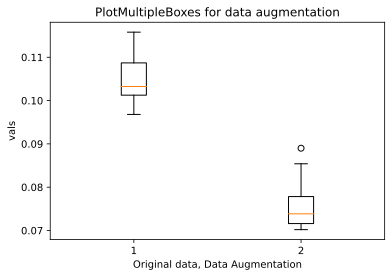

In [234]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(boxes)
ax.set_title('PlotMultipleBoxes for data augmentation')
ax.set_xlabel('Original data, Data Augmentation')
ax.set_ylabel('vals')
plt.show()

# Initializa a new commmitte vote instead of mode or median vote 
## Use frequency weights on probability of committe vote

### If the mode vote is greater than number of model * (tune parameter p), then we choose this vote as our prediction for each new test data

### If the mode vote is less than number of model * (tune parameter p), then we use below method to choose vote

# As an example, we randomly generate 10 models for predicting 10 digit numbers as probability 2D matrix

In [249]:
np.random.seed(123)
a = np.random.rand(10,10)
a

array([[0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
        0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752],
       [0.34317802, 0.72904971, 0.43857224, 0.0596779 , 0.39804426,
        0.73799541, 0.18249173, 0.17545176, 0.53155137, 0.53182759],
       [0.63440096, 0.84943179, 0.72445532, 0.61102351, 0.72244338,
        0.32295891, 0.36178866, 0.22826323, 0.29371405, 0.63097612],
       [0.09210494, 0.43370117, 0.43086276, 0.4936851 , 0.42583029,
        0.31226122, 0.42635131, 0.89338916, 0.94416002, 0.50183668],
       [0.62395295, 0.1156184 , 0.31728548, 0.41482621, 0.86630916,
        0.25045537, 0.48303426, 0.98555979, 0.51948512, 0.61289453],
       [0.12062867, 0.8263408 , 0.60306013, 0.54506801, 0.34276383,
        0.30412079, 0.41702221, 0.68130077, 0.87545684, 0.51042234],
       [0.66931378, 0.58593655, 0.6249035 , 0.67468905, 0.84234244,
        0.08319499, 0.76368284, 0.24366637, 0.19422296, 0.57245696],
       [0.09571252, 0.88532683, 0.6272489

In [250]:
num_model = 10
vote = np.empty(num_model)
ind_pro = {0: [], 1: [],2: [],3: [],4: [],5: [],6: [],7: [],8: [],9: []}
for j in np.arange(num_model):
    vote[j] = np.argmax(a[j, :])
    ind_pro.get(vote[j]).append(np.amax(a[j, :]))
m, n = stats.mode(vote, axis=None)
ind_new = {}
for key, value in ind_pro.items():
    if value != []:
        ind_new[key] = value
ind_mean = {}
ind_num = {}
for key, value in ind_new.items():
    ind_mean[key] = np.mean(value)
    ind_num[key] = len(value)
ind_final = {}
for key in ind_new:
    ind_final[key] = ind_mean[key] * ind_num[key] / num_model
need = max(ind_final.values())
for key, value in ind_final.items():
    if value == need:
        pred = key

In [251]:
def pri_dic(dic):
    for key, value in dic.items():
        print("\n", key, ": ", value)

# Vote Results and probability for each voted digit number then compute mean of each list

In [252]:
def pri_avg(dic):
    dic1 = {}
    for key, value in dic.items():
        dic1[key] = str(value) + ' / %d = %.16f' % (len(value), np.mean(value))
    pri_dic(dic1)

In [253]:
print("Vote results:", vote, "\n")
pri_avg(ind_new) 

Vote results: [6. 5. 1. 8. 7. 8. 4. 1. 4. 1.] 


 1 :  [0.8494317940777896, 0.8853268262751396, 0.9953584820340174] / 3 = 0.9100390341289822

 4 :  [0.8423424376202573, 0.9251324896139861] / 2 = 0.8837374636171217

 5 :  [0.7379954057320357] / 1 = 0.7379954057320357

 6 :  [0.9807641983846155] / 1 = 0.9807641983846155

 7 :  [0.985559785610705] / 1 = 0.9855597856107050

 8 :  [0.9441600182038796, 0.8754568417951749] / 2 = 0.9098084299995273


In [254]:
def pri_mul(dic1, dic2):
    dic = {}
    for key1, value1 in dic1.items():
        for key2, value2 in dic2.items():
            if key1 == key2:
                dic[key1] = "%.16f * (%d / 10) = %.16f" % (value1, value2, value1 * value2 / 10)
    pri_dic(dic)

# Compute average probability of each digit multiplied by their weights

In [255]:
pri_mul(ind_mean, ind_num)


 1 :  0.9100390341289822 * (3 / 10) = 0.2730117102386947

 4 :  0.8837374636171217 * (2 / 10) = 0.1767474927234243

 5 :  0.7379954057320357 * (1 / 10) = 0.0737995405732036

 6 :  0.9807641983846155 * (1 / 10) = 0.0980764198384615

 7 :  0.9855597856107050 * (1 / 10) = 0.0985559785610705

 8 :  0.9098084299995273 * (2 / 10) = 0.1819616859999054


In [256]:
def committe_vote(p, **kwargs):
    '''
    redefine a new committe vote modality
    '''
    con = []
    for key, value in kwargs.items():
        value = np.expand_dims(value, 0)
        con.append(value)
    new = np.concatenate(con, axis = 0)
    num_test = new.shape[1]
    num_model = new.shape[0]
    num_class = new.shape[2]
    pred = np.empty(shape=num_test)

    for i in range(num_test):
        ma = new[:, i, :]
        vote = np.empty(num_model)
        ind_pro = {0: [], 1: [],2: [],3: [],4: [],5: [],6: [],7: [],8: [],9: []}
        for j in np.arange(num_model):
            vote[j] = np.argmax(ma[j, :])
            ind_pro.get(vote[j]).append(np.amax(ma[j, :]))
        m, n = stats.mode(vote, axis=None)
        if n >= num_model * p:
            pred[i] = m
        else:
            ind_new = {}
            for key, value in ind_pro.items():
                if value != []:
                    ind_new[key] = value
            ind_mean = {}
            ind_num = {}
            for key, value in ind_new.items():
                ind_mean[key] = np.mean(value)
                ind_num[key] = len(value)
            ind_final = {}
            for key in ind_new:
                ind_final[key] = ind_mean[key] * ind_num[key] / num_model
            need = max(ind_final.values())
            for key, value in ind_final.items():
                if value == need:
                    pred[i] = key
    return pred

In [141]:
P = 0.7
Nrestart = 10
boxes2 = []
PEG_median = np.empty((Nrestart))
PEG_pro_wei = np.empty((Nrestart))
for i in np.arange(Nrestart):
    # the data, split between train and test sets
    (X_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

    # Scale images to the [0, 1] range
    x_test = x_test.astype("float32") / 255
    #X_train = X_train.astype("float32") / 255
    # Make sure images have shape (28, 28, 1)
    X_train = np.expand_dims(X_train, -1)
    x_test = np.expand_dims(x_test, -1)

    X_com = X_train[:600, :, :, :]
    y_com = y_train[:600]

    model, history = CNNfit(X_com, y_com)
    y1 = model.predict(x_test, verbose = 1)
    model, history = CNNfit(X_com, y_com)
    y2 = model.predict(x_test, verbose = 1)
    model, history = CNNfit(X_com, y_com)
    y3 = model.predict(x_test, verbose = 1)
    model, history = CNNfit(X_com, y_com)
    y4 = model.predict(x_test, verbose = 1)
    model, history = CNNfit(X_com, y_com)
    y5 = model.predict(x_test, verbose = 1)
    model, history = CNNfit(X_com, y_com)
    y6 = model.predict(x_test, verbose = 1)
    model, history = CNNfit(X_com, y_com)
    y7 = model.predict(x_test, verbose = 1)
    model, history = CNNfit(X_com, y_com)
    y8 = model.predict(x_test, verbose = 1)
    model, history = CNNfit(X_com, y_com)
    y9 = model.predict(x_test, verbose = 1)
    model, history = CNNfit(X_com, y_com)
    y10 = model.predict(x_test, verbose = 1)

    Nerr1 = 0
    for k in range(len(y_test)):
        v1 = np.argmax(y1[k])
        v2 = np.argmax(y2[k])
        v3 = np.argmax(y3[k])
        v4 = np.argmax(y4[k])
        v5 = np.argmax(y5[k])
        v6 = np.argmax(y6[k])
        v7 = np.argmax(y7[k])
        v8 = np.argmax(y8[k])
        v9 = np.argmax(y9[k])
        v10 = np.argmax(y10[k])
        vote = np.median([v1,v2,v3,v4,v5,v6,v7,v8,v9,v10])
        if int(vote) != int(y_test[k]):
            Nerr1 += 1

    PEG1 = Nerr1 / len(y_test)
    PEG_median[i] = PEG1

    re1 = committe_vote(p=P, m1 = y1, m2 = y2, m3 = y3, m4 = y4, m5 = y5, m6 = y6, m7 = y7, m8 = y8, m9 = y9, m10 = y10)
    Nerr2 = 0
    for q in range(len(y_test)):
        if int(re1[q]) != int(y_test[q]):
            Nerr2 += 1
    PEG2 = Nerr2/len(y_test)
    PEG_pro_wei[i] = PEG2

313/313 [==============================] - 0s 1ms/step


# After using 10 restarts and 10 models as a committe, we used box plot to compare their performance.

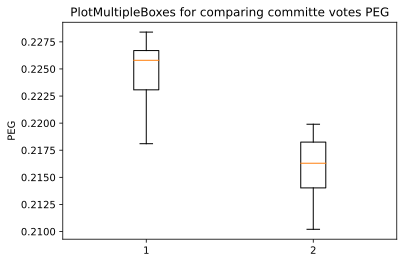

In [163]:
boxes2 = [PEG_median, PEG_pro_wei]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(boxes2)
ax.set_title('PlotMultipleBoxes for comparing committe votes PEG')
ax.set_ylabel('PEG')
plt.show()

## What have we learned?

1. By doing this research project, I have learned how to design our initial algorithm to imporve current algorithms and think to push the boundary of current research work. 

2. By conducting a self-paced research, it encourages me to think independently and learn new things

3. Use boxes plot or other methods to test our initial method

# Thanks